In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



In [125]:
#load the data csv file to pandas dataframe
df=pd.read_csv("C:\\Users\\balar\\Downloads\\car data.csv")

In [129]:
# first 5 rows of dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
#last 5 rows
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [141]:
#describe()function only generates descriptive statistics for numeric columns in a pandas DataFrame
df.describe()


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,11.372093
std,5.082812,8.642584,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,7.000000
25%,0.900000,1.200000,15000.000000,0.000000,9.000000
50%,3.600000,6.400000,32000.000000,0.000000,11.000000
75%,6.000000,9.900000,48767.000000,0.000000,13.000000
max,35.000000,92.600000,500000.000000,3.000000,22.000000


In [143]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [139]:
# Add a new column: car age
df['Car_Age'] = 2025 - df['Year']

# Drop irrelevant columns
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Display updated dataset
print(df.head())

   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  


In [147]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [145]:
#getting some information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Selling_Price            301 non-null    float64
 1   Present_Price            301 non-null    float64
 2   Driven_kms               301 non-null    int64  
 3   Owner                    301 non-null    int64  
 4   Car_Age                  301 non-null    int64  
 5   Fuel_Type_Diesel         301 non-null    bool   
 6   Fuel_Type_Petrol         301 non-null    bool   
 7   Selling_type_Individual  301 non-null    bool   
 8   Transmission_Manual      301 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 13.1 KB


In [101]:
#checking the no of missing values
print(df.isnull().sum())


Car_Name               0
Selling_Price(lacs)    0
Present_Price(lacs)    0
Driven_kms             0
Fuel_Type              0
Selling_type           0
Transmission           0
Past_Owners            0
Age                    0
dtype: int64


In [93]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2.85,4.15,5200,0,0,0,0,14
4,swift,4.60,6.87,42450,1,0,0,0,11


In [27]:
# check the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [29]:
#checking no of rows and no of columns
df.shape


(301, 9)

## encoding the categorical data


In [36]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':3}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [38]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting data and target

In [40]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']



In [44]:
X


,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [46]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [48]:
X.corr()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,-0.047192,-0.524342,0.046490,-0.039896,-0.000394,-0.182104
Present_Price,-0.047192,1.000000,0.203618,0.405556,-0.512121,0.348776,0.008058
Driven_kms,-0.524342,0.203618,1.000000,0.156503,-0.101419,0.162510,0.089216
Fuel_Type,0.046490,0.405556,0.156503,1.000000,-0.336755,0.068794,-0.054068
Selling_type,-0.039896,-0.512121,-0.101419,-0.336755,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.348776,0.162510,0.068794,-0.063240,1.000000,0.050316
Owner,-0.182104,0.008058,0.089216,-0.054068,0.124269,0.050316,1.000000


splitting train and test data

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

model training

In [53]:
model=RandomForestRegressor(n_estimators=100)


In [57]:
#fit the model
model.fit(X_train,Y_train)


RandomForestRegressor()

In [69]:
#make predictions
Y_pred=model.predict(X_train)

In [71]:
#Evaluate the model
mse=mean_squared_error(Y_train,Y_pred)
mae=mean_absolute_error(Y_train,Y_pred)
r2=r2_score(Y_train,Y_pred)

print(f"Mean Squared Error:{mse}")
print(f"Mean Absolute Error:{mae}")
print(f"R-squared:{r2}")


Mean Squared Error:0.3031314908888886
Mean Absolute Error:0.22489555555555532
R-squared:0.9888333671030086


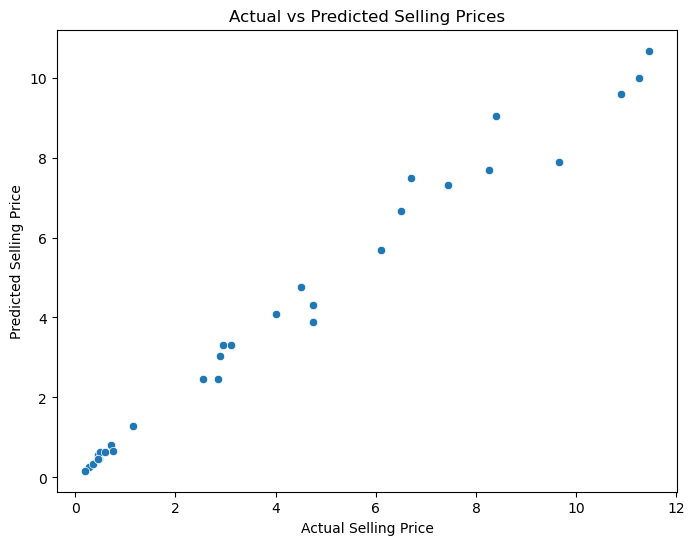

In [374]:
#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test,y=Y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Prices")
plt.show()
